### **Project Title: Kidney Disease Progression Prediction**  

#### **Introduction**  
Chronic Kidney Disease (CKD) is a serious health condition where kidney function slowly declines over time. Early detection is important to prevent further damage. In this project, we use machine learning to predict CKD based on 14 medical features like blood pressure, hemoglobin levels, and creatinine levels. The dataset used for this project is available on **[Kaggle](https://www.kaggle.com/datasets/abhia1999/chronic-kidney-disease)**.  

#### **Overview**  
This is a **classification problem**, where the goal is to predict whether a person has CKD or not. We use machine learning models like **Random Forest, XGBoost, and many more to make accurate predictions. The dataset contains important health indicators that help in identifying CKD at an early stage.  

#### **Objectives**  
This project aims to analyze the CKD dataset, clean and preprocess the data, and train machine learning models to predict kidney disease. Models are evaluated using accuracy, precision, and recall to find the best approach. The goal is to provide insights for early diagnosis and better treatment of CKD.

### **Step 1: Import Necessary Libraries & Load the Dataset**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("new_model.csv")  # Replace with actual file path

# Display first few rows
df.head()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1


### **Step 2: Basic Data Exploration**

In [7]:
df.columns

Index(['Bp', 'Sg', 'Al', 'Su', 'Rbc', 'Bu', 'Sc', 'Sod', 'Pot', 'Hemo', 'Wbcc',
       'Rbcc', 'Htn', 'Class'],
      dtype='object')

In [8]:
# we can rename all the columns to their full names for better clarity
df.rename(columns={
    'Bp': 'Blood Pressure',
    'Sg': 'Specific Gravity',
    'Al': 'Albumin',
    'Su': 'Sugar',
    'Rbc': 'Red Blood Cells',
    'Htn': 'Hypertension',
    'Bu': 'Blood Urea',
    'Sc': 'Serum Creatinine',
    'Sod': 'Sodium',
    'Pot': 'Potassium',
    'Hemo': 'Hemoglobin',
    'Wbcc': 'White Blood Cell Count',
    'Rbcc': 'Red Blood Cell Count',
    'Class': 'Class'  # Assuming this is the target column
}, inplace=True)

# Display the updated column names
print(df.columns)


Index(['Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar',
       'Red Blood Cells', 'Blood Urea', 'Serum Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'White Blood Cell Count',
       'Red Blood Cell Count', 'Hypertension', 'Class'],
      dtype='object')


In [9]:
# Shape of Datasets
print(df.shape)

(400, 14)


In [10]:
# Check dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Blood Pressure          400 non-null    float64
 1   Specific Gravity        400 non-null    float64
 2   Albumin                 400 non-null    float64
 3   Sugar                   400 non-null    float64
 4   Red Blood Cells         400 non-null    float64
 5   Blood Urea              400 non-null    float64
 6   Serum Creatinine        400 non-null    float64
 7   Sodium                  400 non-null    float64
 8   Potassium               400 non-null    float64
 9   Hemoglobin              400 non-null    float64
 10  White Blood Cell Count  400 non-null    float64
 11  Red Blood Cell Count    400 non-null    float64
 12  Hypertension            400 non-null    float64
 13  Class                   400 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 43.

In [12]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Blood Pressure            0
Specific Gravity          0
Albumin                   0
Sugar                     0
Red Blood Cells           0
Blood Urea                0
Serum Creatinine          0
Sodium                    0
Potassium                 0
Hemoglobin                0
White Blood Cell Count    0
Red Blood Cell Count      0
Hypertension              0
Class                     0
dtype: int64


In [15]:
# Summary statistics for numerical columns
print("Summary Statistics:")
df.describe()

Summary Statistics:


,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,White Blood Cell Count,Red Blood Cell Count,Hypertension,Class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,76.455000,1.017712,1.015000,0.395000,0.882500,57.40550,3.07235,137.529025,4.627850,12.526900,8406.090000,4.708275,0.369350,0.625000
std,13.476536,0.005434,1.272329,1.040038,0.322418,49.28597,5.61749,9.204273,2.819783,2.716171,2523.219976,0.840315,0.482023,0.484729
min,50.000000,1.005000,0.000000,0.000000,0.000000,1.50000,0.40000,4.500000,2.500000,3.100000,2200.000000,2.100000,0.000000,0.000000
25%,70.000000,1.015000,0.000000,0.000000,1.000000,27.00000,0.90000,135.000000,4.000000,10.875000,6975.000000,4.500000,0.000000,0.000000
50%,78.000000,1.020000,1.000000,0.000000,1.000000,44.00000,1.40000,137.530000,4.630000,12.530000,8406.000000,4.710000,0.000000,1.000000
75%,80.000000,1.020000,2.000000,0.000000,1.000000,61.75000,3.07000,141.000000,4.800000,14.625000,9400.000000,5.100000,1.000000,1.000000
max,180.000000,1.025000,5.000000,5.000000,1.000000,391.00000,76.00000,163.000000,47.000000,17.800000,26400.000000,8.000000,1.000000,1.000000


In [16]:
# Display unique values count for each column
for col in df.columns:
    print(f"\nColumn: {col}")
    print(f"Unique Values: {df[col].nunique()}")
    print(df[col].value_counts())  # Shows the count of each unique value
    print("-" * 50)


Column: Blood Pressure
Unique Values: 11
Blood Pressure
80.0     116
70.0     112
60.0      71
90.0      53
100.0     25
76.0      12
50.0       5
110.0      3
140.0      1
180.0      1
120.0      1
Name: count, dtype: int64
--------------------------------------------------

Column: Specific Gravity
Unique Values: 5
Specific Gravity
1.020    153
1.010     84
1.025     81
1.015     75
1.005      7
Name: count, dtype: int64
--------------------------------------------------

Column: Albumin
Unique Values: 6
Albumin
0.0    199
1.0     90
2.0     43
3.0     43
4.0     24
5.0      1
Name: count, dtype: int64
--------------------------------------------------

Column: Sugar
Unique Values: 6
Sugar
0.0    339
2.0     18
3.0     14
4.0     13
1.0     13
5.0      3
Name: count, dtype: int64
--------------------------------------------------

Column: Red Blood Cells
Unique Values: 2
Red Blood Cells
1.0    353
0.0     47
Name: count, dtype: int64
-------------------------------------------------

Based on above results, we found that our datasets contain categorical and numerical columns.  

### **Categorical Columns:**  
These columns contain discrete values or categories (0/1 or text-based labels).  
- Rbc (Red blood cells) ===> Discrete values (1. = Yes and 0. = No)
- Htn (Hypertension) ===> Binary categorical (1 = Yes, 0 = No)
- Class (Target variable) ===> Binary categorical (1 = CKD, 0 = No CKD)  

### **Numerical Columns:**  
These columns contain continuous numerical values:  
- **Bp** (Blood Pressure)  
- **Sg** (Specific Gravity)  
- **Al** (Albumin)  
- **Su** (Sugar)  
- **Bu** (Blood Urea)  
- **Sc** (Serum Creatinine)  
- **Sod** (Sodium)  
- **Pot** (Potassium)  
- **Hemo** (Hemoglobin)  
- **Wbcc** (White Blood Cell Count)  
- **Rbcc** (Red Blood Cell Count)  

In [25]:
# Unique value and value counts
print(df["Hypertension"].unique())
print(df["Hypertension"].value_counts())

[1.   0.   0.37]
Hypertension
0.00    251
1.00    147
0.37      2
Name: count, dtype: int64


=====> Since only 2 records contain 0.37 while 398 records have valid values (0.00 and 1.00), removing them will not significantly affect the dataset.
0.37 seems like a data entry error or an outlier, so dropping these rows is a good decision.
But according to my assumption, replace 0.37 with the mode (most frequent value) is better than removing value.

In [26]:
# Replace 0.37 with the most frequent value (mode)
df['Hypertension'] = df['Hypertension'].replace(0.37, df['Hypertension'].mode()[0])

In [ ]:
print(df["Hypertension"].value_counts())

Hypertension
0.0    253
1.0    147
Name: count, dtype: int64


### **Step 3: Apply Exploratory Data Analysis (EDA)**

#### **First analysis target column**

In [28]:
# Checking the distribution of target variable
print("\nTarget Variable Distribution:")
print(df['Class'].value_counts())


Target Variable Distribution:
Class
1    250
0    150
Name: count, dtype: int64


In [33]:
# Percentage of CKD vs Non-CKD
print(df['Class'].value_counts(normalize=True) * 100)

Class
1    62.5
0    37.5
Name: proportion, dtype: float64


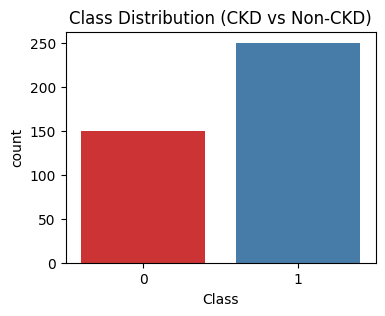

In [ ]:
# CountPlot for target variable
plt.figure(figsize=(4,3))
sns.countplot(x=df['Class'], hue=df['Class'], palette="Set1", legend=False)
plt.title("Class Distribution (CKD vs Non-CKD)")
plt.show()

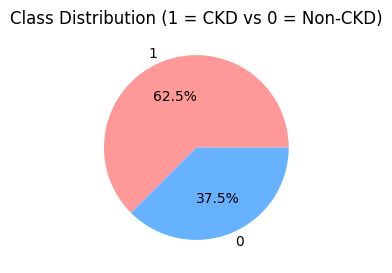

In [42]:
# Create the pie chart
plt.figure(figsize=(4, 3))
plt.pie(df['Class'].value_counts(), labels=df['Class'].value_counts().index, autopct='%1.1f%%', colors=["#FF9999", "#66B2FF"])
plt.title("Class Distribution (1 = CKD vs 0 = Non-CKD)")
plt.show()